# Supervised Modelling

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Kiet Vu**  |  03/23  | File Created.
- **Kiet Vu**  |  04/21  | Testing and modeling by Decision Trees Regression
---

- **[Logistic Regression](#LogisticRegression)**:
This is a popular statistical method used for binary classification problems. You can use logistic regression to predict the target variable based on the categorical attributes.
        Columns chosen:
<br>

- **[Decision Trees](#DecisionTrees)**:
Decision trees are a popular algorithm for classification problems, especially when the data has categorical attributes. Decision trees can be used to split the data based on the categories of the attributes, and make a prediction based on the majority class at each leaf node.
        
        Columns chosen:
'unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"

<br>

- **[Random Forests](#RandomForests)**: 
Random forests are an ensemble method that combines multiple decision trees to improve the accuracy of the predictions. Random forests are especially useful for high-dimensional datasets with a large number of categorical attributes.
        Columns chosen:
<br>

- **[Naive Bayes](#NaiveBayers)**: 
Naive Bayes is a simple probabilistic algorithm used for classification tasks. It assumes that the attributes are conditionally independent given the target variable, and uses Bayes' theorem to calculate the probability of each class given the attributes.
        Columns chosen:
<br>

- **[K-Nearest Neighbor (K-NN)](KNN)**: 
K-NN is a non-parametric algorithm that can be used for classification tasks. It works by finding the K nearest neighbors of a new data point based on the categorical attributes, and assigning a class label based on the majority class of the neighbors.
        Columns chosen:
        
---

## Import libraries and raw data

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("Clean Data/ready_dataset_20230420.csv", low_memory=False)
df = data.copy()
df.head(30)

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_DESCRIP_FLAG,B2B_BUSINESS_GROW_FLAG,...,B2B_TENANT_FLAG,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD,CAC_SEGMENT,usage,status
0,0001230a214b39e0e5c463bfe440fb15,44240,OH,NaN,C,A,A,N,N,C,...,NaN,2.0,D,NaN,NaN,25.0,201801.0,Manufacturing,81440.0,FINALLED
1,000345e997e72b61b990d2689c76427f,15218,PA,NaN,D,A,C,N,N,NaN,...,A,NaN,B,NaN,1.0,99.0,198405.0,Business and Finance,556.3,ACTIVE
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,OH,ADMV,C,B,B,N,N,C,...,A,2.0,A,1.0,NaN,16.0,201909.0,Personal Services,32564.0,FINALLED
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,IL,NaN,D,NaN,B,N,N,C,...,NaN,2.0,C,NaN,NaN,21.0,199104.0,Blue Collar Work,5519.0,FINALLED
4,00095201031df44962513f378842d521,61111,IL,DMV,A,A,A,N,N,C,...,B,2.0,A,NaN,1.0,83.0,201303.0,General Merchandise,5946.0,ACTIVE
5,000a04481ee5acbb856a7c485a67423a,62526,IL,NaN,E,A,D,N,N,C,...,A,2.0,D,NaN,1.0,50.0,201902.0,Personal Services,75468.0,FINALLED
6,000bee0b537b676a975a15999776581f,2110,MA,NaN,C,B,C,N,N,C,...,NaN,1.0,A,NaN,NaN,10.0,202011.0,Food and Dining,88280.0,FINALLED
7,000c88d34beda722f7b559bb056b7809,78064,TX,ADMV,A,A,A,N,N,C,...,NaN,2.0,A,NaN,NaN,29.0,201303.0,Hotels and Educational Boarding,109258.0,ACTIVE
8,000f645a52095f72ec723133e2b0092c,45601,OH,NaN,D,NaN,A,N,N,C,...,C,2.0,B,NaN,1.0,97.0,202007.0,"Public, Health, and Social Services",9686.0,FINALLED
9,00109796f3c34d87f1ff2778498a8016,18330,PA,NaN,NaN,NaN,NaN,N,N,NaN,...,NaN,2.0,NaN,NaN,NaN,0.0,201909.0,Unknown,65700.0,FINALLED


---
## Logistic Regression <a class="anchor" id="LogisticRegression"></a>

---
## Decision Trees <a class="anchor" id="DecisionTrees"></a>

https://towardsdatascience.com/decision-tree-ba64f977f7c3
https://www.kaggle.com/code/arpikr/decision-tree-regression-model
https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df_train_data = df[['unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]]
df_train_data

,unique_identifier,usage,status,B2B_EMPLOYEE_SIZE,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_BIG_BUSINESS_INDICATOR,B2B_SMALL_SIZE_FLAG,B2B_MEDIUM_SIZE_FLAG,B2B_HIGH_TECH_FLAG,B2B_TELECOMMUNICATIONS_CODE,B2B_UTILITY_CODE,B2B_COMPUTER_EXPENSE_CODE,B2B_PURCHASE_PRINT_EXPENSE_CODE,CAC_SEGMENT,B2B_WHITE_COLLAR_PRCNT
0,0001230a214b39e0e5c463bfe440fb15,81440.0,FINALLED,C,6,N,N,Y,N,B,D,E,NaN,Manufacturing,25.0
1,000345e997e72b61b990d2689c76427f,556.3,ACTIVE,B,A,N,Y,N,N,D,B,F,D,Business and Finance,99.0
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,32564.0,FINALLED,C,3,N,N,Y,N,B,A,D,B,Personal Services,16.0
3,00082675e86a9f3cf5fdcc5d4cd9114d,5519.0,FINALLED,B,2,N,Y,N,N,C,C,D,NaN,Blue Collar Work,21.0
4,00095201031df44962513f378842d521,5946.0,ACTIVE,A,3,N,N,N,N,A,A,A,A,General Merchandise,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49479,fff7c0d1b2f896b1018ef67a9d286361,11980.0,FINALLED,A,2,N,Y,N,N,A,A,C,A,Business and Finance,97.0
49480,fffce8918ebaae88423f62806f22c414,11080.0,ACTIVE,A,2,N,Y,N,N,B,A,D,D,Business and Finance,94.0
49481,fffd155082881fa090b08ca6ceed7005,93876.0,ACTIVE,B,2,N,Y,N,N,A,B,C,A,Auto,17.0
49482,fffe3fcb6ca0166ec15af3958ac145e8,9072.0,ACTIVE,B,3,N,Y,N,N,B,A,E,G,Personal Services,21.0


In [5]:
independents = df.iloc[:,2:16]
independents

,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_DESCRIP_FLAG,B2B_BUSINESS_GROW_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_CALL_STATUS,B2B_COMPUTER_EXPENSE_CODE,B2B_CONTRACT_LABOR_EXPENSE_CODE,B2B_CREDIT_FLAG,B2B_CREDIT_GRADE
0,OH,NaN,C,A,A,N,N,C,6,C,E,C,A,A
1,PA,NaN,D,A,C,N,N,NaN,A,A,F,NaN,A,B
2,OH,ADMV,C,B,B,N,N,C,3,M,D,B,C,C+
3,IL,NaN,D,NaN,B,N,N,C,2,C,D,B,B,B+
4,IL,DMV,A,A,A,N,N,C,3,M,A,A,U,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49479,MA,NaN,B,NaN,A,N,N,C,2,W,C,B,C,C
49480,MA,NaN,C,A,A,N,N,C,2,C,D,C,B,B+
49481,TX,NaN,B,NaN,A,N,N,C,2,N,C,B,B,B+
49482,MA,NaN,C,A,B,N,N,G,3,S,E,B,B,B


In [6]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   B2B_ADDR_STATE                   49484 non-null  object
 1   B2B_ACCEPT_CREDIT_CARD_FLAG      12526 non-null  object
 2   B2B_ACCOUNTING_EXPENSE_CODE      40247 non-null  object
 3   B2B_AD_SIZE                      28766 non-null  object
 4   B2B_ADVERTISING_EXPENSE_CODE     41895 non-null  object
 5   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  object
 6   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  object
 7   B2B_BUSINESS_GROW_FLAG           40952 non-null  object
 8   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  object
 9   B2B_CALL_STATUS                  45635 non-null  object
 10  B2B_COMPUTER_EXPENSE_CODE        41724 non-null  object
 11  B2B_CONTRACT_LABOR_EXPENSE_CODE  40870 non-null  object
 12  B2B_CREDIT_FLAG                 

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
independents = independents.apply(le.fit_transform)
independents

,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_DESCRIP_FLAG,B2B_BUSINESS_GROW_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,B2B_CALL_STATUS,B2B_COMPUTER_EXPENSE_CODE,B2B_CONTRACT_LABOR_EXPENSE_CODE,B2B_CREDIT_FLAG,B2B_CREDIT_GRADE
0,6,73,2,0,0,0,0,2,5,2,4,2,0,0
1,7,73,3,0,2,0,0,6,8,0,5,7,0,2
2,6,52,2,1,1,0,0,2,2,6,3,1,2,5
3,1,73,3,4,1,0,0,2,1,2,3,1,1,3
4,1,62,0,0,0,0,0,2,2,6,0,0,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49479,2,73,1,4,0,0,0,2,1,11,2,1,2,4
49480,2,73,2,0,0,0,0,2,1,2,3,2,1,3
49481,8,73,1,4,0,0,0,2,1,7,2,1,1,3
49482,2,73,2,0,1,0,0,3,2,10,4,1,1,2


In [8]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   B2B_ADDR_STATE                   49484 non-null  int32
 1   B2B_ACCEPT_CREDIT_CARD_FLAG      49484 non-null  int32
 2   B2B_ACCOUNTING_EXPENSE_CODE      49484 non-null  int32
 3   B2B_AD_SIZE                      49484 non-null  int32
 4   B2B_ADVERTISING_EXPENSE_CODE     49484 non-null  int32
 5   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  int32
 6   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  int32
 7   B2B_BUSINESS_GROW_FLAG           49484 non-null  int32
 8   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  int32
 9   B2B_CALL_STATUS                  49484 non-null  int32
 10  B2B_COMPUTER_EXPENSE_CODE        49484 non-null  int32
 11  B2B_CONTRACT_LABOR_EXPENSE_CODE  49484 non-null  int32
 12  B2B_CREDIT_FLAG                  49484 non-nul

In [9]:
#sns.set(rc={'figure.figsize':(35,16)}) #35,16
#sns.pairplot(independents,palette='Set1')


In [10]:
# assuming that usage is int!!!! make all independents as float ( way better and use regressors)
X = independents
y = df_train_data["usage"]

In [11]:
y

0        81440.0
1          556.3
2        32564.0
3         5519.0
4         5946.0
          ...   
49479    11980.0
49480    11080.0
49481    93876.0
49482     9072.0
49483    20892.0
Name: usage, Length: 49484, dtype: float64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   B2B_ADDR_STATE                   49484 non-null  int32
 1   B2B_ACCEPT_CREDIT_CARD_FLAG      49484 non-null  int32
 2   B2B_ACCOUNTING_EXPENSE_CODE      49484 non-null  int32
 3   B2B_AD_SIZE                      49484 non-null  int32
 4   B2B_ADVERTISING_EXPENSE_CODE     49484 non-null  int32
 5   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  int32
 6   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  int32
 7   B2B_BUSINESS_GROW_FLAG           49484 non-null  int32
 8   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  int32
 9   B2B_CALL_STATUS                  49484 non-null  int32
 10  B2B_COMPUTER_EXPENSE_CODE        49484 non-null  int32
 11  B2B_CONTRACT_LABOR_EXPENSE_CODE  49484 non-null  int32
 12  B2B_CREDIT_FLAG                  49484 non-nul

In [13]:
for i in X:
    X[i] = X[i].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   B2B_ADDR_STATE                   49484 non-null  float64
 1   B2B_ACCEPT_CREDIT_CARD_FLAG      49484 non-null  float64
 2   B2B_ACCOUNTING_EXPENSE_CODE      49484 non-null  float64
 3   B2B_AD_SIZE                      49484 non-null  float64
 4   B2B_ADVERTISING_EXPENSE_CODE     49484 non-null  float64
 5   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  float64
 6   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  float64
 7   B2B_BUSINESS_GROW_FLAG           49484 non-null  float64
 8   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  float64
 9   B2B_CALL_STATUS                  49484 non-null  float64
 10  B2B_COMPUTER_EXPENSE_CODE        49484 non-null  float64
 11  B2B_CONTRACT_LABOR_EXPENSE_CODE  49484 non-null  float64
 12  B2B_CREDIT_FLAG   

Split the data to train with test size = 30% , train size = 70%

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

The main difference between a decision tree classifier and a decision tree regressor in scikit-learn is the type of output they produce.

A decision tree classifier is used when the target variable is categorical or qualitative in nature, meaning that it takes on discrete values or categories. The classifier will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a class label to each subset based on the majority class of the instances in that subset. The output of the classifier is a discrete class label or category for each instance in the data.

On the other hand, a decision tree regressor is used when the target variable is continuous or quantitative in nature, meaning that it takes on a range of values. The regressor will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a numeric value to each subset based on the mean or median value of the instances in that subset. The output of the regressor is a continuous value or range of values for each instance in the data.

In summary, the decision tree classifier and decision tree regressor differ in the type of output they produce - discrete class labels for the classifier, and continuous values for the regressor - and the type of target variable they are designed to hand

In [15]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [16]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
dtree.score(X_train,y_train)

0.9303157032050657

In [18]:
dtree.score(X_test,y_test)

-1.091411679624974

evaluate the decision tree

In [19]:
y_pred= dtree.predict(X_test)

Mean squared error: 60418198147.71
Mean absolute error: 87989.68
R-squared: -1.09


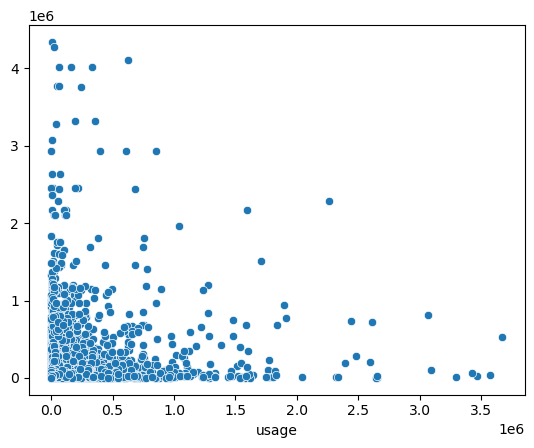

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

Visualize the evaluation of the model

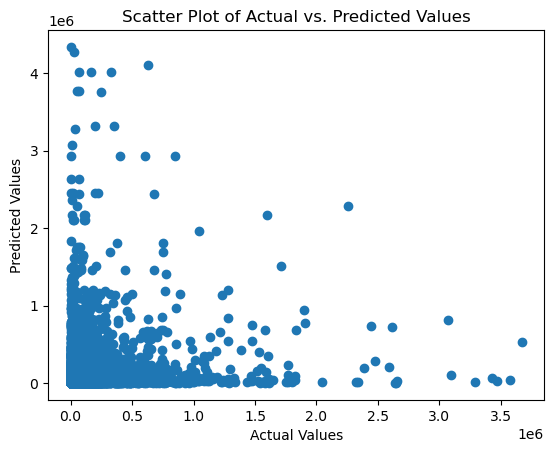

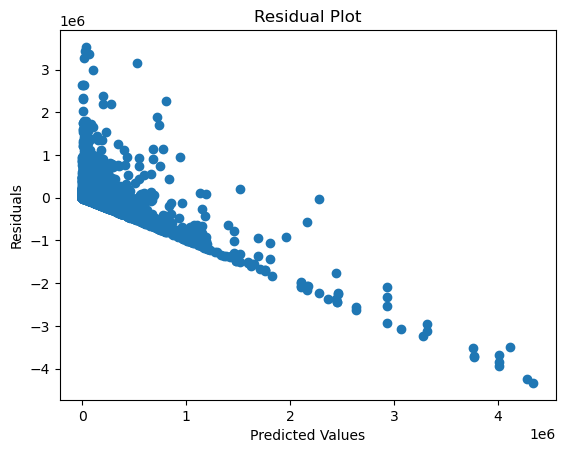

R-squared: -1.091411679624974


In [21]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

In [22]:
dtree.feature_importances_
pd.Series(dtree.feature_importances_,index=independents.columns).sort_values(ascending=False)

B2B_CALL_STATUS                    0.171567
B2B_ACCOUNTING_EXPENSE_CODE        0.103096
B2B_CREDIT_GRADE                   0.098884
B2B_ADDR_STATE                     0.093269
B2B_BUSINESS_SQUARE_FOOT_NUM       0.090751
B2B_ADVERTISING_EXPENSE_CODE       0.086046
B2B_AD_SIZE                        0.068676
B2B_ACCEPT_CREDIT_CARD_FLAG        0.051299
B2B_CONTRACT_LABOR_EXPENSE_CODE    0.050425
B2B_COMPUTER_EXPENSE_CODE          0.049777
B2B_CREDIT_FLAG                    0.048295
B2B_BIG_BUSINESS_INDICATOR         0.041308
B2B_BUSINESS_GROW_FLAG             0.032643
B2B_BUSINESS_DESCRIP_FLAG          0.013964
dtype: float64

C:\Users\PREDATOR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='usage', ylabel='Density'>

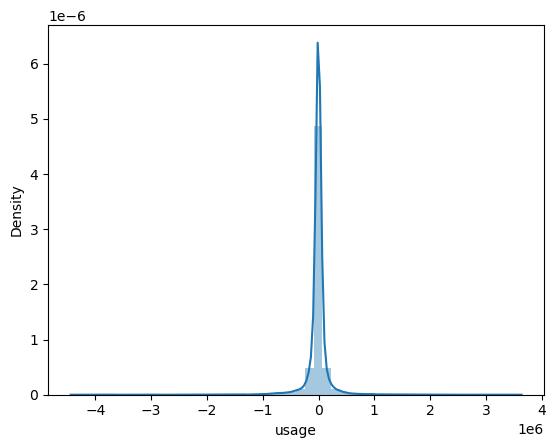

In [25]:
sns.distplot(y_test-y_pred)

Hyperparameter tuning

In [31]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [32]:
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [33]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

In [34]:
# best hyperparameters  (don't even run it, took me an hour!!)
#tuning_model.best_params_

#{'max_depth': 5,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_samples_leaf': 1,
# 'min_weight_fraction_leaf': 0.1,
# 'splitter': 'best'}

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [35]:
# best model score
tuning_model.best_score_

-30113003214.87705

In [44]:
dtree_tuned= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [45]:
# fitting model
dtree_tuned.fit(X_train,y_train)

C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [46]:
# prediction 
y_tuned_pred=dtree_tuned.predict(X_test)

Mean squared error: 27312410581.69
Mean absolute error: 68800.44
R-squared: 0.05


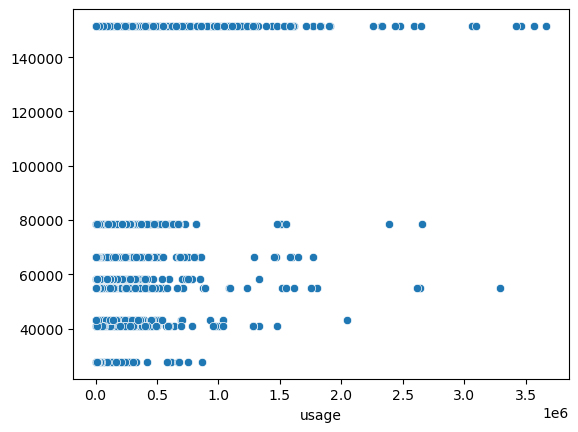

In [47]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
r2 = r2_score(y_test, y_tuned_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_tuned_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

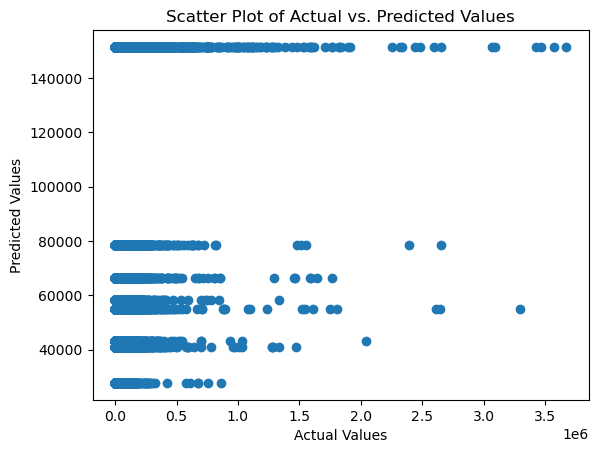

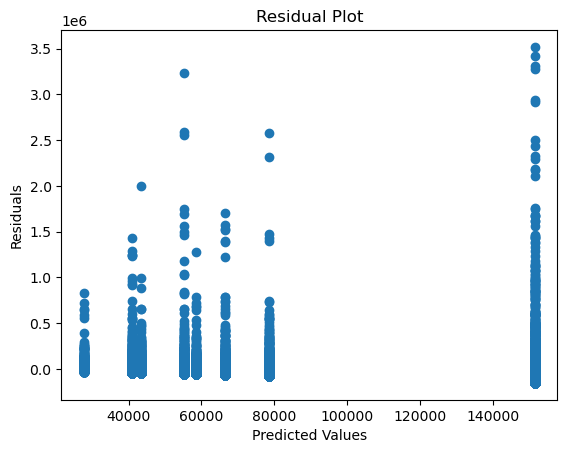

R-squared: 0.05456474637647535


In [48]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_tuned_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_tuned_pred
plt.scatter(y_tuned_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_tuned_pred)
print('R-squared:', r_squared)

In [51]:
dtree_tuned.feature_importances_
feat_importances= pd.Series(dtree_tuned.feature_importances_,index=independents.columns).sort_values(ascending=False)
feat_importances

B2B_BUSINESS_SQUARE_FOOT_NUM       0.919767
B2B_ADVERTISING_EXPENSE_CODE       0.068236
B2B_CALL_STATUS                    0.007452
B2B_ADDR_STATE                     0.004545
B2B_ACCEPT_CREDIT_CARD_FLAG        0.000000
B2B_ACCOUNTING_EXPENSE_CODE        0.000000
B2B_AD_SIZE                        0.000000
B2B_BIG_BUSINESS_INDICATOR         0.000000
B2B_BUSINESS_DESCRIP_FLAG          0.000000
B2B_BUSINESS_GROW_FLAG             0.000000
B2B_COMPUTER_EXPENSE_CODE          0.000000
B2B_CONTRACT_LABOR_EXPENSE_CODE    0.000000
B2B_CREDIT_FLAG                    0.000000
B2B_CREDIT_GRADE                   0.000000
dtype: float64

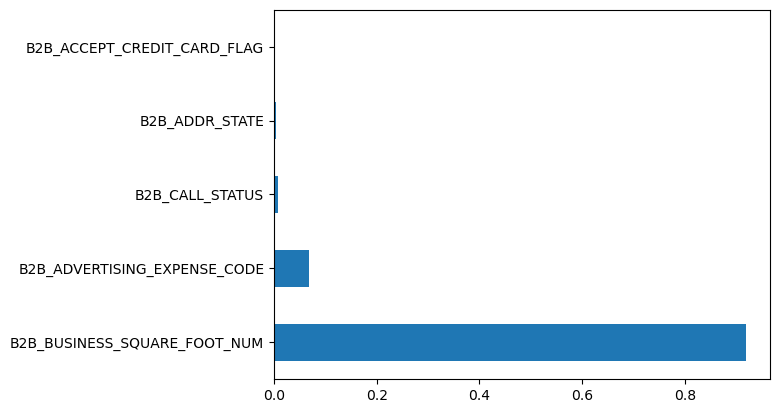

In [52]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

A confusion matrix is typically used after training a classification model, including decision trees, to evaluate the performance of the model on a validation or test set. The confusion matrix allows you to see the number of true positives, false positives, true negatives, and false negatives generated by the model, which can help you understand how well the model is performing and identify any areas for improvement.

By contrast, decision trees are a type of supervised learning algorithm that can be used for both classification and regression tasks. Decision trees are used to create a model that predicts the value of a target variable based on several input variables or features. The decision tree algorithm works by recursively splitting the data based on the most informative features, with the goal of creating subsets of the data that are more homogeneous with respect to the target variable.

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix
#display(confusion_matrix(y_test,predictions))

plot the confusion matrix

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

#cm = confusion_matrix(y_test,predictions)
#cmd = ConfusionMatrixDisplay(cm, display_labels= df_train_data['usage'])
#cmd.plot()

In [ ]:
#display(classification_report(y_test,predictions))

visualize the tree

In [41]:
independents.columns

Index(['B2B_ADDR_STATE', 'B2B_ACCEPT_CREDIT_CARD_FLAG',
       'B2B_ACCOUNTING_EXPENSE_CODE', 'B2B_AD_SIZE',
       'B2B_ADVERTISING_EXPENSE_CODE', 'B2B_BIG_BUSINESS_INDICATOR',
       'B2B_BUSINESS_DESCRIP_FLAG', 'B2B_BUSINESS_GROW_FLAG',
       'B2B_BUSINESS_SQUARE_FOOT_NUM', 'B2B_CALL_STATUS',
       'B2B_COMPUTER_EXPENSE_CODE', 'B2B_CONTRACT_LABOR_EXPENSE_CODE',
       'B2B_CREDIT_FLAG', 'B2B_CREDIT_GRADE'],
      dtype='object')

In [42]:
#import sys
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install graphviz

from IPython.display import Image
import six
import graphviz
#from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydot

features = list(independents.columns[:])
features

['B2B_ADDR_STATE',
 'B2B_ACCEPT_CREDIT_CARD_FLAG',
 'B2B_ACCOUNTING_EXPENSE_CODE',
 'B2B_AD_SIZE',
 'B2B_ADVERTISING_EXPENSE_CODE',
 'B2B_BIG_BUSINESS_INDICATOR',
 'B2B_BUSINESS_DESCRIP_FLAG',
 'B2B_BUSINESS_GROW_FLAG',
 'B2B_BUSINESS_SQUARE_FOOT_NUM',
 'B2B_CALL_STATUS',
 'B2B_COMPUTER_EXPENSE_CODE',
 'B2B_CONTRACT_LABOR_EXPENSE_CODE',
 'B2B_CREDIT_FLAG',
 'B2B_CREDIT_GRADE']

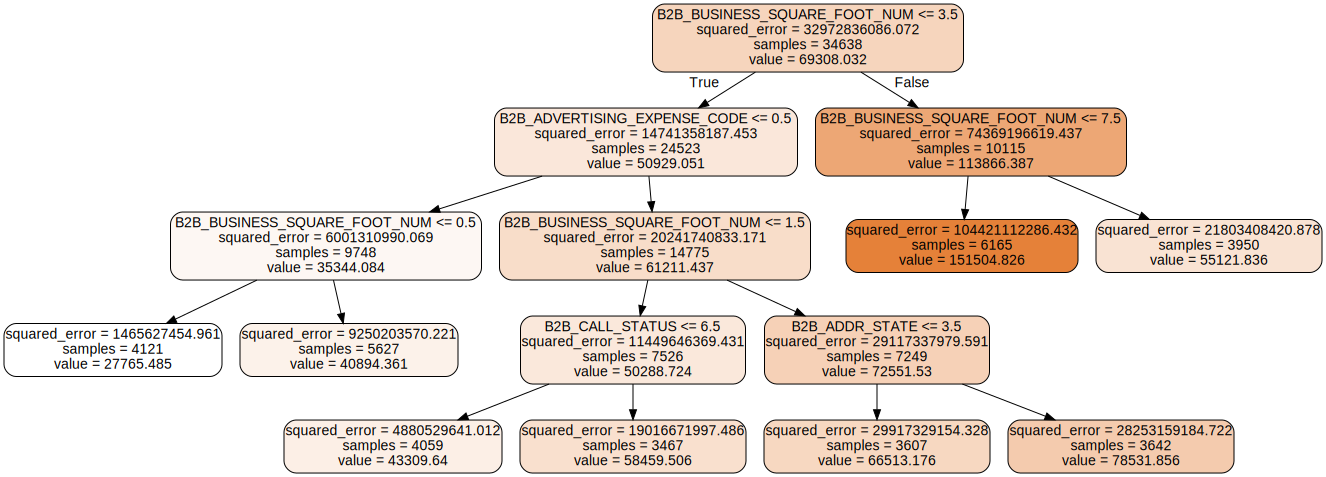

In [49]:
dot_data = export_graphviz(dtree_tuned,filled=True,rounded=True, feature_names=independents.columns, out_file=None)

graphviz.Source(dot_data)

---
## Random Forests <a class="anchor" id="RandomForests"></a>

---
## Naive Bayers <a class="anchor" id="NaiveBayers"></a>

---
## K-Nearest Neighbor (K-NN) <a class="anchor" id="KNN"></a>

In [ ]:
# Setting independent variables
df["B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]
